# Play with a trained network

In [1]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import time
import utils
import matplotlib
from random import randint

### two_layer_net class

In [2]:
class two_layer_net(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(two_layer_net , self).__init__()
        self.linear_layer1 = nn.Linear( input_size, hidden_size , bias=False)
        self.linear_layer2 = nn.Linear( hidden_size, output_size , bias=False)        
        
    def forward(self, x):
        y = self.linear_layer1(x)
        y = F.relu(y)
        y = self.linear_layer2(y)
        z = F.softmax(y, dim=0)
        return z

### Create an instance of the network. The weights are randomly initialized. 

In [3]:
net=two_layer_net(784,50,10)
print(net)

two_layer_net(
  (linear_layer1): Linear(in_features=784, out_features=50, bias=False)
  (linear_layer2): Linear(in_features=50, out_features=10, bias=False)
)


### The weights in the second layer are contained in a 10 x 50 matrix. Lets look at the first row of this matrix. We see random small numbers.

In [4]:
print(net.linear_layer2.weight[0])

tensor([ 0.1002,  0.0209,  0.0568, -0.0710,  0.0655,  0.0483, -0.1187,  0.0806,
         0.0221,  0.0764, -0.0660,  0.0125, -0.0591, -0.1022,  0.0841,  0.0714,
         0.0059, -0.0949,  0.1407, -0.1274,  0.0810, -0.1230, -0.0428, -0.0216,
        -0.0906,  0.0492, -0.0541, -0.1211,  0.0210,  0.0640,  0.0040, -0.0350,
        -0.1374,  0.0148,  0.0303, -0.0204,  0.0693, -0.1350, -0.0769, -0.0947,
        -0.0944,  0.1286,  0.0319,  0.1392,  0.0039, -0.1171,  0.1005, -0.1255,
         0.1145,  0.0894], grad_fn=<SelectBackward>)


### Replace these random weights by already trained weights that are contained in the file "trained_weights.pt"

In [5]:
tr_wght = torch.load('trained_weights.pt')
net.load_state_dict( tr_wght )

### Let's display the first row of the matrix in the second layer:

In [6]:
print(net.linear_layer2.weight[0])

tensor([-0.5835, -0.2985, -0.3507,  0.0551, -0.1893, -1.0023, -1.1766, -0.0380,
         0.0369, -0.0634,  0.1386,  0.1972, -0.1308, -0.1694, -0.0594,  0.2821,
         0.2644, -0.5219, -0.3910,  0.2559,  0.0481, -0.4157, -0.0334,  0.1417,
        -0.1375, -0.0499,  0.0798, -0.3978, -0.1330, -0.0278, -0.7361,  0.0077,
        -0.0664,  0.3402, -1.0739, -0.0264,  0.0211, -1.6539, -0.6123,  0.0035,
        -0.1587,  0.0893, -0.0137,  0.4959, -0.1553, -0.9554, -0.5491, -0.0052,
        -0.4425,  0.1817], grad_fn=<SelectBackward>)


### Load the MNIST test set 

In [7]:
test_data=torch.load('../../data/mnist/test_data.pt')

In [8]:
print(test_data.size())

torch.Size([10000, 28, 28])


### Load and display image 53 from test set

torch.Size([28, 28])


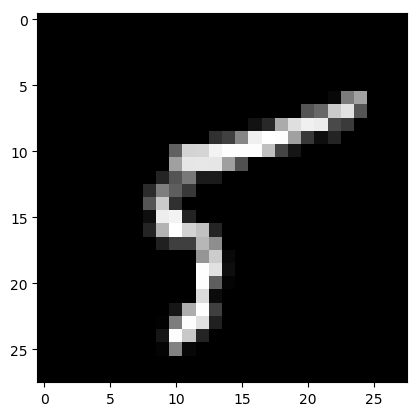

In [20]:
im= test_data[]
print(im.size())
utils.show(im)

### Feed this picture to the network and see how the network classifies it. The picture is a 2-dimensional tensor of size 28 x 28. You can not feed it directly to the network. But you can feed im.view(784)! 

In [21]:
prob= net(im.view(784))
print(prob)

tensor([0.0486, 0.0158, 0.0021, 0.0003, 0.0024, 0.5583, 0.0001, 0.2076, 0.1377,
        0.0271], grad_fn=<SoftmaxBackward>)


### Visualize the confidence score that the net

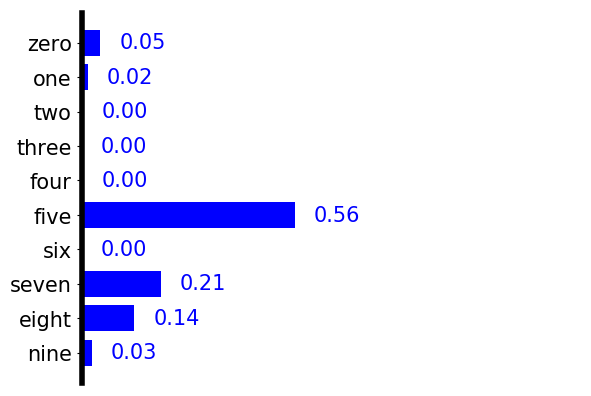

In [22]:
utils.show_prob(prob)

### Go back to two cells above and try picture 111, which is a weird 7. You will see that the network struggle a little more here.

### Try a few other images. You will see that most of the time the network do really well.